In [1]:
import tensorflow as t
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [32]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

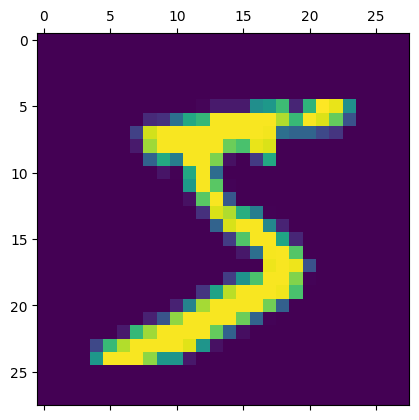

In [6]:
plt.matshow(X_train[0])

In [7]:
# print(X_train[:2])
# print(y_train[:2])

In [8]:
print(X_train.shape)
a = X_train.shape[2]
print(a)

(60000, 28, 28)
28


In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# X_train[0]

In [11]:
X_train_flatten = X_train.reshape(len(X_train), a*a) # you can directly do 28*28
X_test_flatten = X_test.reshape(len(X_test), a*a)

In [12]:
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


## Creating a neural network

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 11s 2ms/step - loss: 0.4717 - accuracy: 0.8761
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9148
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9257
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9269
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9282
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9293
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.9306
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.25

In [14]:
## Testing the accuracy

model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2739 - accuracy: 0.9276


[0.2738795578479767, 0.9276000261306763]

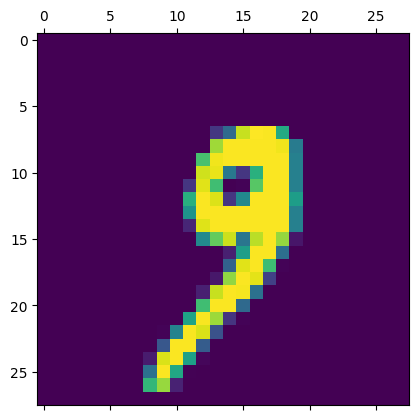

In [24]:
plt.matshow(X_test[1000])

In [29]:
y_pred = model.predict(X_test_flatten)
y_pred[1000]

# X_test_flatten[5]

313/313 [==============================] - 0s 1ms/step


array([1.07980085e-07, 2.60152465e-05, 8.60050568e-06, 8.69394302e-01,
       1.13533787e-01, 8.93629505e-04, 7.53086656e-12, 8.12628388e-01,
       4.06882614e-02, 9.88093019e-01], dtype=float32)

In [26]:
 np.argmax(y_pred[1000])

9

In [27]:
import pickle
with open('model.pkl', 'wb') as f :
    pickle.dump(model, f)